# Exploratory Data Analysis

### Importaciones y configuración inicial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

### Carga del dataset

In [6]:
df = pd.read_csv("C:/Users/Sebastian/Desktop/ProyectoML/bank.csv", sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


The dataset contains information related to direct marketing campaigns of a Portuguese banking institution.
Each row represents a client contacted during a marketing campaign.

### Visión general del dataset.

In [8]:
df.shape

(4521, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


The dataset consists of 4521 observations and 17 features, including both numerical and categorical variables.

### Variable objetivo

In [11]:
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [12]:
df['y'].value_counts(normalize=True)

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

The target variable is highly imbalanced, with approximately 11% of positive cases.
This imbalance motivates the use of appropiete evaluation metrics and class weighting during modeling.

### Valores faltantes

In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing values were found in the dataset.

### Separación conceptual de variables.

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object'))

The dataset contains numerical variables related to client demographics and campaign statistics, as well as categorical vaiables related describing socio-economic attributes and contactv details.

### Análisis de variables categóricas.

* Frecuencias

In [20]:
for col in cat_cols:
    print(f'\n')
    print(df[col].value_counts().head())



job
management     969
blue-collar    946
technician     768
admin.         478
services       417
Name: count, dtype: int64


marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


default
no     4445
yes      76
Name: count, dtype: int64


housing
yes    2559
no     1962
Name: count, dtype: int64


loan
no     3830
yes     691
Name: count, dtype: int64


contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64


month
may    1398
jul     706
aug     633
jun     531
nov     389
Name: count, dtype: int64


poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64


y
no     4000
yes     521
Name: count, dtype: int64


There are dominant categories in several categorical features, such as
`job = management`, `education = secondary`, `housing = yes`, and `loan = no`.

* Categóricas vs Target.

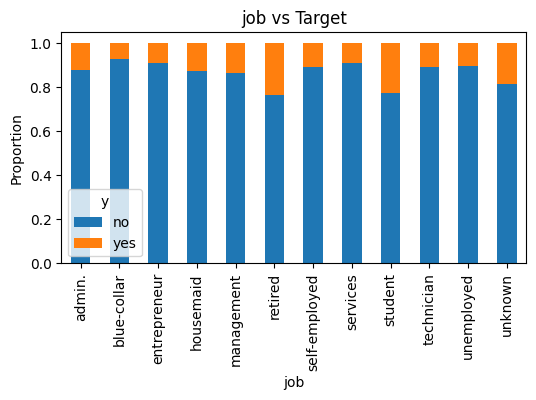

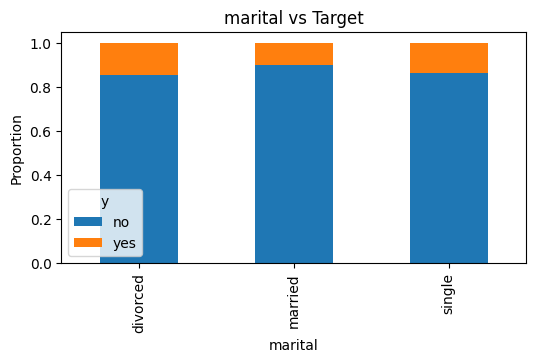

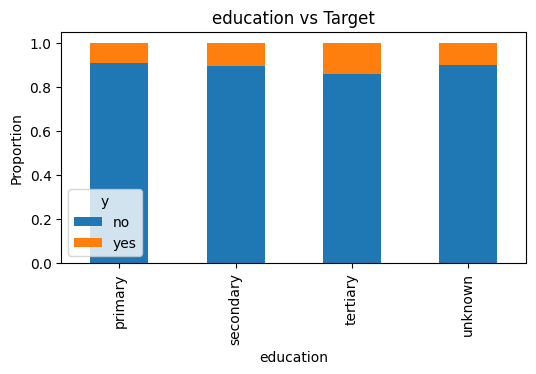

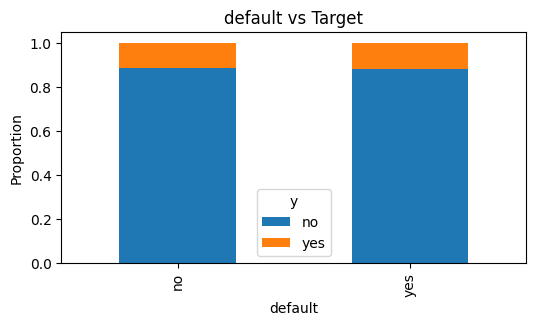

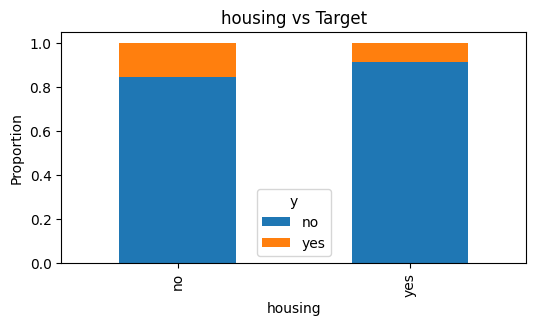

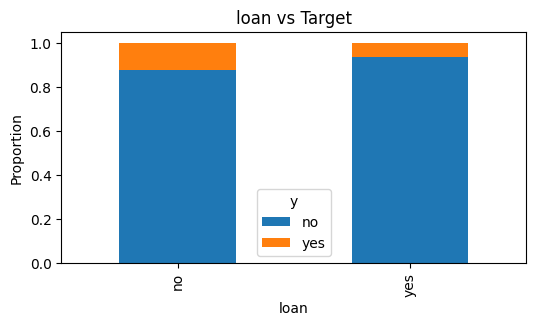

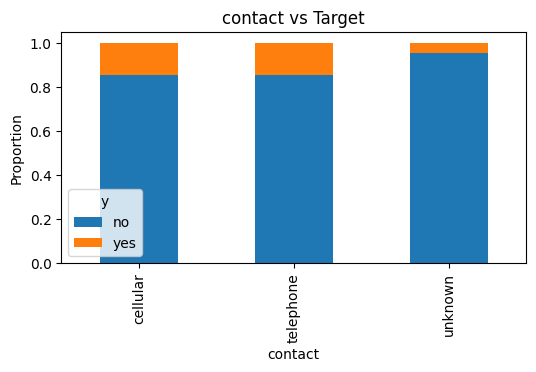

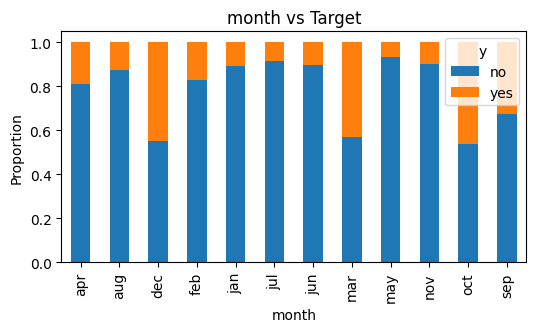

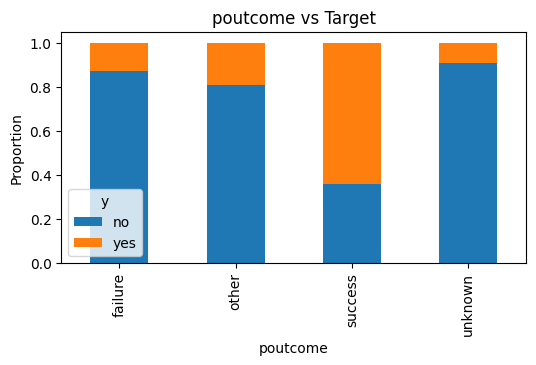

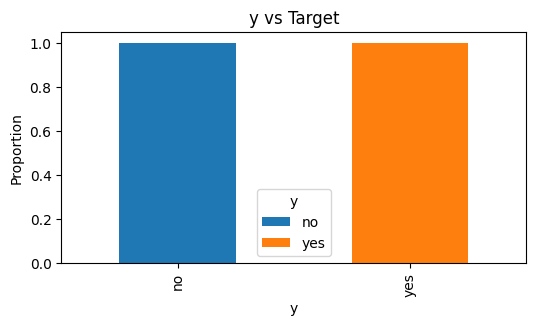

In [21]:
for col in cat_cols:
    ct = pd.crosstab(df[col], df['y'], normalize = 'index')
    ct.plot(kind='bar',stacked = True, figsize=(6,3))
    plt.title(f'{col} vs Target')
    plt.ylabel("Proportion")
    plt.show

La mayoria de las barras se ven balanceadas según la proporción de la variable respuesta estudiada anteriormente. Sin embargo, hay algunas categorias que parecen aumentar la probabilidad de que una persona acepte el servicio ofrecido. Estas son: poutcome = success, month = dec, month = mar, 

### Análisis de Variables Númericas.

<function matplotlib.pyplot.show(close=None, block=None)>

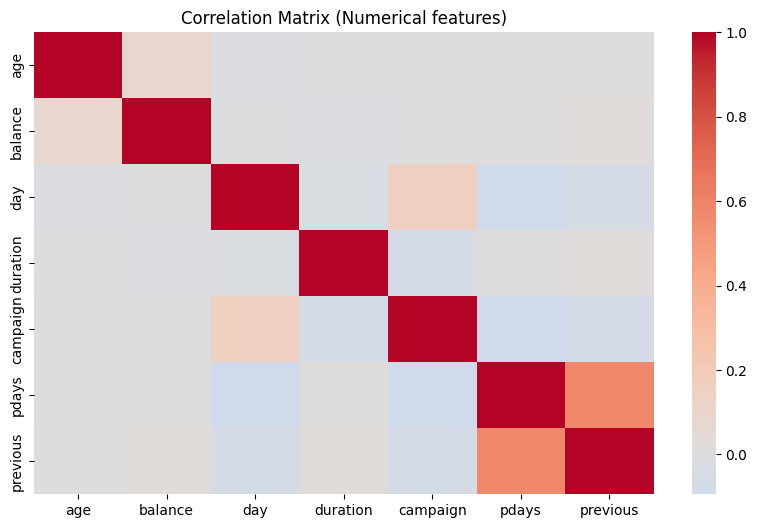

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', center = 0)
plt.title("Correlation Matrix (Numerical features)")
plt.show

Hay poca multicolinealidad fuerte entre todas las variables excepto entre previous y pdays. Tiene sentido pues la información que brindan se puede relacionar. 

## EDA Conclusions

- The dataset presents a strong class imbalance, making accuracy an unsuitable metric.
- Several categorical variables show meaningful differences across target classes.
- These observations motivate the use of feature scaling, one-hot encoding,
  class weighting, and stratified cross-validation in the modeling phase.